# Module 16: Naive Bayes Classifier
## Section– Practice Notebook with TODOs

This notebook is for **practice**. It is aligned with the teaching notebook for Section 16.5.

You will work with two datasets:
1. A **synthetic numeric dataset** created with `make_classification` (for GaussianNB).
2. A **subset of the 20 Newsgroups text dataset** (for MultinomialNB and BernoulliNB).

Where you see `TODO`, write the required code yourself.
You can always refer back to the teaching notebook if you get stuck.

In [31]:
# ===============================================================
# Imports and basic setup
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 4)
sns.set(style='whitegrid')

## Part A – Gaussian Naive Bayes on Synthetic Numeric Data

In this part you will:
- Create a synthetic numeric dataset.
- Split into train and test sets.
- Train a Gaussian Naive Bayes model.
- Evaluate the model with accuracy and a confusion matrix.
- Experiment by changing the dataset difficulty.


In [32]:
# Create a synthetic numeric dataset for binary classification
X, y = make_classification(
    n_samples=600,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.6,
    random_state=42
)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('Class distribution:', np.bincount(y))

Shape of X: (600, 6)
Shape of y: (600,)
Class distribution: [302 298]


In [33]:
# TODO 1: Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (450, 6)
Test set shape: (150, 6)


In [34]:
# TODO 2: Create and train a GaussianNB model

gnb = GaussianNB()         # TODO: create the model
gnb.fit(X_train, y_train)
print('Model training completed.')

Model training completed.


In [35]:
# TODO 3: Make predictions on the test set and compute accuracy
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy of GaussianNB on synthetic data:', acc)

Accuracy of GaussianNB on synthetic data: 0.9733333333333334


Confusion matrix:
 [[73  3]
 [ 1 73]]


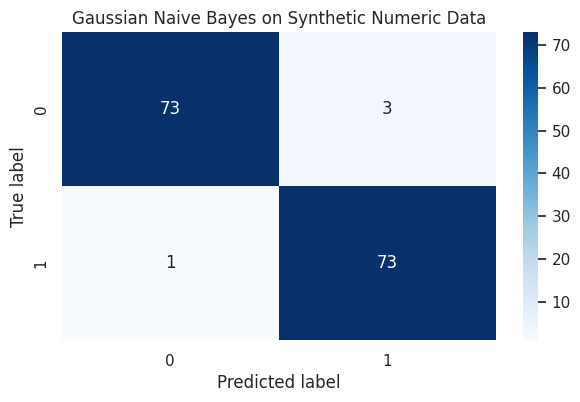

In [36]:
# TODO 4: Compute and plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes on Synthetic Numeric Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [37]:
# TODO 5: Print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.96      0.99      0.97        74

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Experiment: Change the Dataset Difficulty

- Recreate the dataset with a smaller `class_sep` value, such as `class_sep=0.8`.
- Repeat training and evaluation.
- Observe how accuracy and the confusion matrix change.

You can copy your previous code cells and adjust only the `make_classification` call.

## Part B – Naive Bayes for Text Classification (20 Newsgroups Subset)

In this part you will:
- Load a subset of the 20 Newsgroups dataset.
- Convert text into numeric features using `CountVectorizer`.
- Train a `MultinomialNB` classifier.
- Train a `BernoulliNB` classifier with binary features.
- Compare their performance.


In [38]:
# Fetch a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med','rec.autos','sci.crypt']
newsgroups = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)

print('Number of documents:', len(newsgroups.data))
print('Target names:', newsgroups.target_names)

Number of documents: 2964
Target names: ['comp.graphics', 'rec.autos', 'rec.sport.baseball', 'sci.crypt', 'sci.med']


In [39]:
# Put into a DataFrame for easier handling
df_text = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})
df_text.head()

,text,label
0,"OK, I should have read the thread before post...",3
1,"\nLegal or not, I've seen it done. Phone reco...",3
2,Perhaps one way of getting away from this crip...,3
3,"\n: >Hi Netters,\n: >\n: >I'm building a CAD p...",0
4,\n greetings:\n you may be in luck. i seem ...,1


In [40]:
# TODO 6: Split text data into train and test sets

X_train_text, X_test_text, y_train_text, y_test_text =  train_test_split(
    df_text['text'], df_text['label'], test_size=0.25, random_state=42
)

print('Train size:', X_train_text.shape[0])
print('Test size:', X_test_text.shape[0])

Train size: 2223
Test size: 741


In [41]:
# TODO 7: Convert text to count vectors for MultinomialNB

vectorizer = CountVectorizer(stop_words='english', max_features=3000)  # TODO: create CountVectorizer
X_train_counts = vectorizer.fit_transform(X_train_text)  # TODO: fit_transform on X_train_text
X_test_counts = vectorizer.transform(X_test_text)   # TODO: transform on X_test_text

print('Shape of X_train_counts:', X_train_counts.shape)
print('Shape of X_test_counts:', X_test_counts.shape)

Shape of X_train_counts: (2223, 3000)
Shape of X_test_counts: (741, 3000)


In [42]:
# TODO 8: Train a MultinomialNB model on the count vectors

mnb = MultinomialNB()  # TODO: create model
mnb.fit(X_train_counts, y_train_text)
# TODO: fit the model
print('MultinomialNB model trained on text data.')

MultinomialNB model trained on text data.


Accuracy of MultinomialNB on 20 Newsgroups subset: 0.854251012145749
Confusion matrix:
 [[121   6   4   6   7]
 [  7 124   1  13   1]
 [  2   5 139  20   1]
 [  7   3   1 120   3]
 [  4  10   1   6 129]]


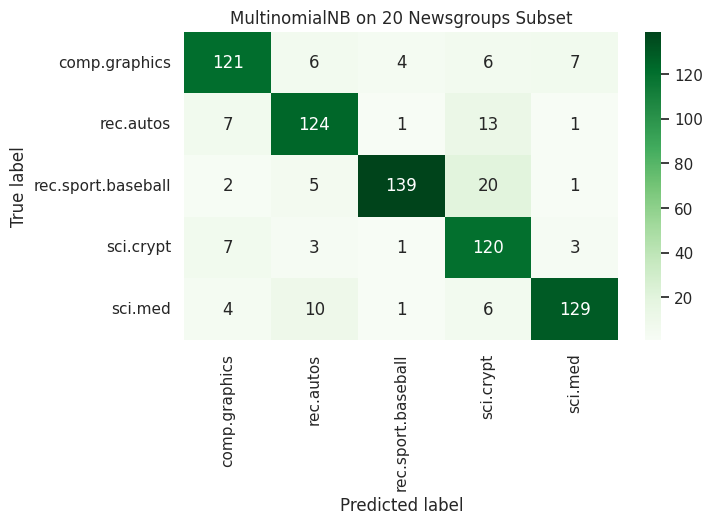

                    precision    recall  f1-score   support

     comp.graphics       0.86      0.84      0.85       144
         rec.autos       0.84      0.85      0.84       146
rec.sport.baseball       0.95      0.83      0.89       167
         sci.crypt       0.73      0.90      0.80       134
           sci.med       0.91      0.86      0.89       150

          accuracy                           0.85       741
         macro avg       0.86      0.86      0.85       741
      weighted avg       0.86      0.85      0.86       741



In [43]:
# TODO 9: Evaluate MultinomialNB

y_pred_text = mnb.predict(X_test_counts)  # TODO: predictions
acc_text = accuracy_score(y_test_text, y_pred_text)     # TODO: accuracy
print('Accuracy of MultinomialNB on 20 Newsgroups subset:', acc_text)

cm_text = confusion_matrix(y_test_text, y_pred_text)      # TODO: confusion matrix
print('Confusion matrix:\n', cm_text)

sns.heatmap(cm_text, annot=True, fmt='d', cmap='Greens',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('MultinomialNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

report_text = classification_report(y_test_text, y_pred_text,
                            target_names=newsgroups.target_names)  # TODO: classification_report
print(report_text)

### 2.1 Practice: Bernoulli Naive Bayes with Binary Features

Now repeat a similar process using `BernoulliNB`:
- Use `CountVectorizer` with `binary=True`.
- Train a `BernoulliNB` model.
- Compare its accuracy and confusion matrix with `MultinomialNB`.


In [44]:
# TODO 10: Create binary bag of words features

vectorizer_bin = CountVectorizer(binary=True) # TODO: CountVectorizer with binary=True
X_train_bin = vectorizer_bin.fit_transform(X_train_text) # TODO: fit_transform
X_test_bin =  vectorizer_bin.transform(X_test_text)# TODO: transform

print('Shape of X_train_bin:', X_train_bin.shape)
print('Shape of X_test_bin:', X_test_bin.shape)

Shape of X_train_bin: (2223, 28781)
Shape of X_test_bin: (741, 28781)


Accuracy of BernoulliNB on 20 Newsgroups subset: 0.6828609986504723
Confusion matrix:
 [[ 89  51   1   2   1]
 [  1 141   0   4   0]
 [  0  36 131   0   0]
 [  2  60   2  70   0]
 [  3  68   3   1  75]]


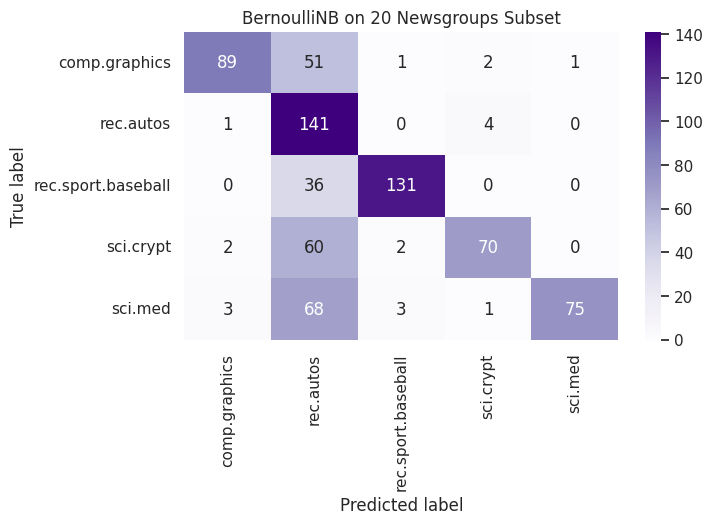

                    precision    recall  f1-score   support

     comp.graphics       0.94      0.62      0.74       144
         rec.autos       0.40      0.97      0.56       146
rec.sport.baseball       0.96      0.78      0.86       167
         sci.crypt       0.91      0.52      0.66       134
           sci.med       0.99      0.50      0.66       150

          accuracy                           0.68       741
         macro avg       0.84      0.68      0.70       741
      weighted avg       0.84      0.68      0.70       741



In [45]:
# TODO 11: Train and evaluate BernoulliNB

bnb = BernoulliNB()  # TODO: create BernoulliNB model
bnb.fit(X_train_bin, y_train_text)
# TODO: fit the model
y_pred_bin = bnb.predict(X_test_bin)  # TODO: predictions
acc_bin = accuracy_score(y_test_text, y_pred_bin)    # TODO: accuracy
print('Accuracy of BernoulliNB on 20 Newsgroups subset:', acc_bin)

cm_bin = confusion_matrix(y_test_text, y_pred_bin)  # TODO: confusion matrix
print('Confusion matrix:\n', cm_bin)

sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Purples',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('BernoulliNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

report_bin = classification_report(y_test_text, y_pred_bin,
                                   target_names=newsgroups.target_names)  # TODO: classification_report
print(report_bin)

## Final Reflection

- Which model worked better on the text data, **MultinomialNB** or **BernoulliNB**?
- How did changing the dataset difficulty in Part A affect the performance of GaussianNB?
- Where do you think Naive Bayes will perform well in real projects (for example, spam detection, topic classification)?

Write a few short notes summarizing your observations.